In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("Assignment 07082024").getOrCreate()

In [4]:
def generate_random_2d_points(n,number_of_particle, x_range=(0, 50), y_range=(0, 100)):
    import numpy as np
    id_range = (1,number_of_particle+1)
    ids = np.random.randint(id_range[0], id_range[1], n)
    x = np.random.randint(x_range[0], x_range[1], n)
    y = np.random.randint(y_range[0], y_range[1], n)
    return np.vstack((ids, x, y)).T

points = generate_random_2d_points(number_of_particle=4,n=300)

In [5]:
from pyspark.sql.types import StructField,StructType,IntegerType
point_schema = StructType([
    StructField("particle_id", IntegerType(), False),
    StructField("x", IntegerType(), False),
    StructField("y", IntegerType(), False)
])

In [6]:
df = spark.createDataFrame(points,schema=point_schema)

In [7]:
def create_df_by_particle_id(df):
    df_dict = {}
    number_of_particle_id = df.select("particle_id").distinct().count()
    for particle_id in range(1,number_of_particle_id+1):
        df_dict[f"df_{particle_id}"] = df.filter(f"particle_id = {particle_id}")
    return df_dict

In [8]:
df_dict = create_df_by_particle_id(df=df)

C:\Users\laptop\AppData\Local\Temp\ipykernel_8652\961872737.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(points[simplex, 0], points[simplex, 1], 'k-',color='black')
C:\Users\laptop\AppData\Local\Temp\ipykernel_8652\961872737.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(points[simplex, 0], points[simplex, 1], 'k-',color='black')
C:\Users\laptop\AppData\Local\Temp\ipykernel_8652\961872737.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(points[simplex, 0], points[simplex, 1], 'k-',color='black')
C:\Users\laptop\AppData\Local\Temp\ipykernel_8652\961872737.py:12: UserWarning: color is redundantly defined by the 'c

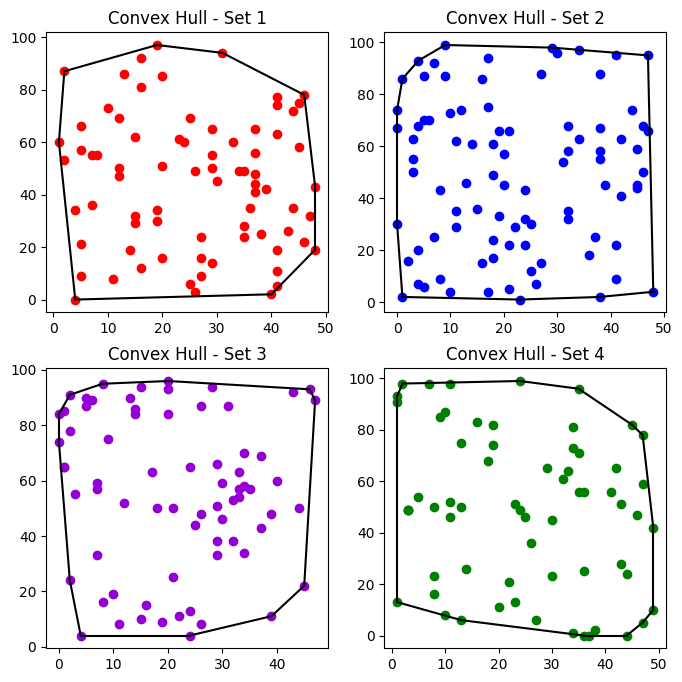

In [9]:
def plot_points_with_hull(x, y, color, ax):
    
    import numpy as np
    from scipy.spatial import ConvexHull

    if len(x) < 3:
        return  # Convex hull cannot be computed with fewer than 3 points
    points = np.column_stack((x, y))
    hull = ConvexHull(points)
    ax.plot(x, y, 'o', label='Points',color=f"{color}")
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], 'k-',color='black')
    # ax.fill(points[hull.vertices, 0], points[hull.vertices, 1], 'lightblue', alpha=0.5)

def figure_config(x, y):
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(2, 2, figsize=(x, y))
    axs = axs.ravel()  # Flatten the 2x2 array of axes
    return fig,axs

def get_x_y(df):
    x, y = df.select("x").toPandas().values.flatten(), df.select("y").toPandas().values.flatten()
    return x, y

def draw(axs,df_dict):
    colors = ['red','blue','darkviolet','green']
    for i,color in zip(range(1,len(df_dict)+1),colors):
        x, y = get_x_y(df_dict[f'df_{i}'])
        plot_points_with_hull(x=x, y=y, color=color, ax=axs[i-1])
        axs[i-1].set_title(f'Convex Hull - Set {i}')

fig, axs = figure_config(8, 8)

draw(axs=axs, df_dict=df_dict)